In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
style.use('seaborn')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
from flask import Flask, jsonify

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
for row in session.query(Measurement, Measurement.date, Measurement.station, Measurement.prcp).limit(5).all():
    print(row)


(<sqlalchemy.ext.automap.measurement object at 0x110facfd0>, '2010-01-01', 'USC00519397', 0.08)
(<sqlalchemy.ext.automap.measurement object at 0x110fc8080>, '2010-01-02', 'USC00519397', 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x110fc80f0>, '2010-01-03', 'USC00519397', 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x110fc8160>, '2010-01-04', 'USC00519397', 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x110fc81d0>, '2010-01-06', 'USC00519397', None)


In [12]:
# Calculate the date 1 year ago from today
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(latest_date)

last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(last_year)

('2017-08-23',)
2016-08-23


In [13]:
# Perform a query to retrieve the data and precipitation scores

precipitation = session.query(Measurement.date, Measurement.station, Measurement.prcp) \
    .filter(Measurement.date > last_year).\
    order_by(Measurement.date).all()
print(precipitation)

[('2016-08-24', 'USC00519397', 0.08), ('2016-08-24', 'USC00513117', 2.15), ('2016-08-24', 'USC00514830', 2.28), ('2016-08-24', 'USC00517948', None), ('2016-08-24', 'USC00519523', 1.22), ('2016-08-24', 'USC00519281', 2.15), ('2016-08-24', 'USC00516128', 1.45), ('2016-08-25', 'USC00519397', 0.08), ('2016-08-25', 'USC00513117', 0.08), ('2016-08-25', 'USC00514830', 0.0), ('2016-08-25', 'USC00517948', 0.0), ('2016-08-25', 'USC00519523', 0.21), ('2016-08-25', 'USC00519281', 0.06), ('2016-08-25', 'USC00516128', 0.11), ('2016-08-26', 'USC00519397', 0.0), ('2016-08-26', 'USC00513117', 0.03), ('2016-08-26', 'USC00514830', 0.02), ('2016-08-26', 'USC00517948', 0.04), ('2016-08-26', 'USC00519523', 0.0), ('2016-08-26', 'USC00519281', 0.01), ('2016-08-27', 'USC00519397', 0.0), ('2016-08-27', 'USC00513117', 0.18), ('2016-08-27', 'USC00514830', 0.02), ('2016-08-27', 'USC00519523', 0.0), ('2016-08-27', 'USC00519281', 0.12), ('2016-08-27', 'USC00516128', None), ('2016-08-28', 'USC00519397', 0.01), ('2016

In [14]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation)
precipitation_df.head()

,date,station,prcp
0,2016-08-24,USC00519397,0.08
1,2016-08-24,USC00513117,2.15
2,2016-08-24,USC00514830,2.28
3,2016-08-24,USC00517948,NaN
4,2016-08-24,USC00519523,1.22


In [15]:
# Sort the dataframe by date
#SETTING DATE AS THE INDEX
precipitation_df.set_index('date').head()

,station,prcp
date,,
2016-08-24,USC00519397,0.08
2016-08-24,USC00513117,2.15
2016-08-24,USC00514830,2.28
2016-08-24,USC00517948,NaN
2016-08-24,USC00519523,1.22


<IPython.core.display.Javascript object>


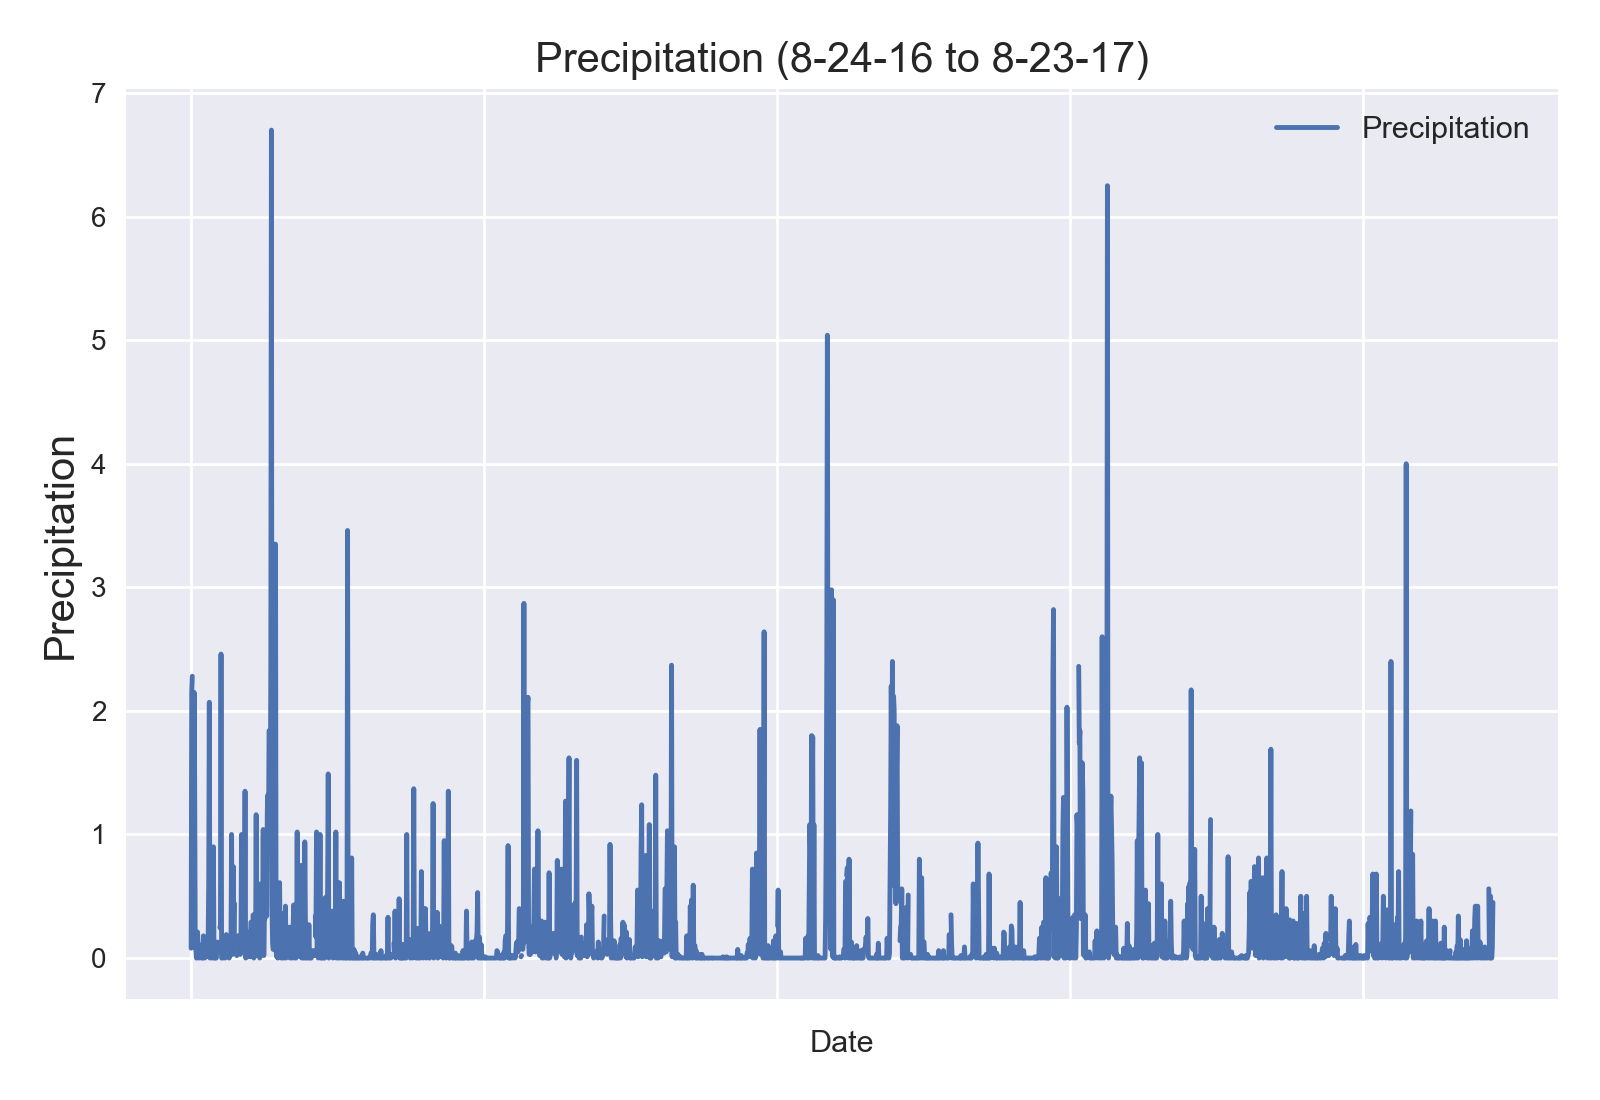

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data

precipitation_df.plot('date', 'prcp')
precipitation_df.set_index('date', inplace=True)
plt.xlabel("Date")
plt.ylabel("Precipitation", fontsize=15)
plt.title("Precipitation (8-24-16 to 8-23-17)", fontsize=15)
plt.legend(["Precipitation"], loc='upper right', fontsize=11)
# Rotate the xticks for the dates
plt.tight_layout()
plt.xticks(rotation=90,  fontsize=6)
plt.savefig("Precipitation.png")
plt.show()

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [20]:
# How many stations are available in this dataset?
number_of_stations = session.query(Measurement).group_by(Measurement.station).count()
number_of_stations

9

In [21]:
# What are the most active stations?
# List the stations and the counts in descending order.

most_active_stations = session.query(Measurement.station, func.count(Measurement.date)) \
.order_by(func.count(Measurement.date).desc()).group_by(Measurement.station).all()

most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

active_station = session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)) \
    .filter(Measurement.station == 'USC00519281').all()

active_station

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [23]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

busiest = active_station[0][0]

station_tobs = session.query(Measurement.station, Measurement.date, Measurement.tobs) \
    .filter(Measurement.station == busiest) \
    .filter(Measurement.date >= '2016-08-23').filter(Measurement.date <= '2017-08-23') \
    .order_by(Measurement.date).all()

station_tobs 


[('USC00519281', '2016-08-23', 77.0),
 ('USC00519281', '2016-08-24', 77.0),
 ('USC00519281', '2016-08-25', 80.0),
 ('USC00519281', '2016-08-26', 80.0),
 ('USC00519281', '2016-08-27', 75.0),
 ('USC00519281', '2016-08-28', 73.0),
 ('USC00519281', '2016-08-29', 78.0),
 ('USC00519281', '2016-08-30', 77.0),
 ('USC00519281', '2016-08-31', 78.0),
 ('USC00519281', '2016-09-01', 80.0),
 ('USC00519281', '2016-09-02', 80.0),
 ('USC00519281', '2016-09-03', 78.0),
 ('USC00519281', '2016-09-04', 78.0),
 ('USC00519281', '2016-09-05', 78.0),
 ('USC00519281', '2016-09-06', 73.0),
 ('USC00519281', '2016-09-07', 74.0),
 ('USC00519281', '2016-09-08', 80.0),
 ('USC00519281', '2016-09-09', 79.0),
 ('USC00519281', '2016-09-10', 77.0),
 ('USC00519281', '2016-09-11', 80.0),
 ('USC00519281', '2016-09-12', 76.0),
 ('USC00519281', '2016-09-13', 79.0),
 ('USC00519281', '2016-09-14', 75.0),
 ('USC00519281', '2016-09-15', 79.0),
 ('USC00519281', '2016-09-16', 78.0),
 ('USC00519281', '2016-09-17', 79.0),
 ('USC005192

<IPython.core.display.Javascript object>


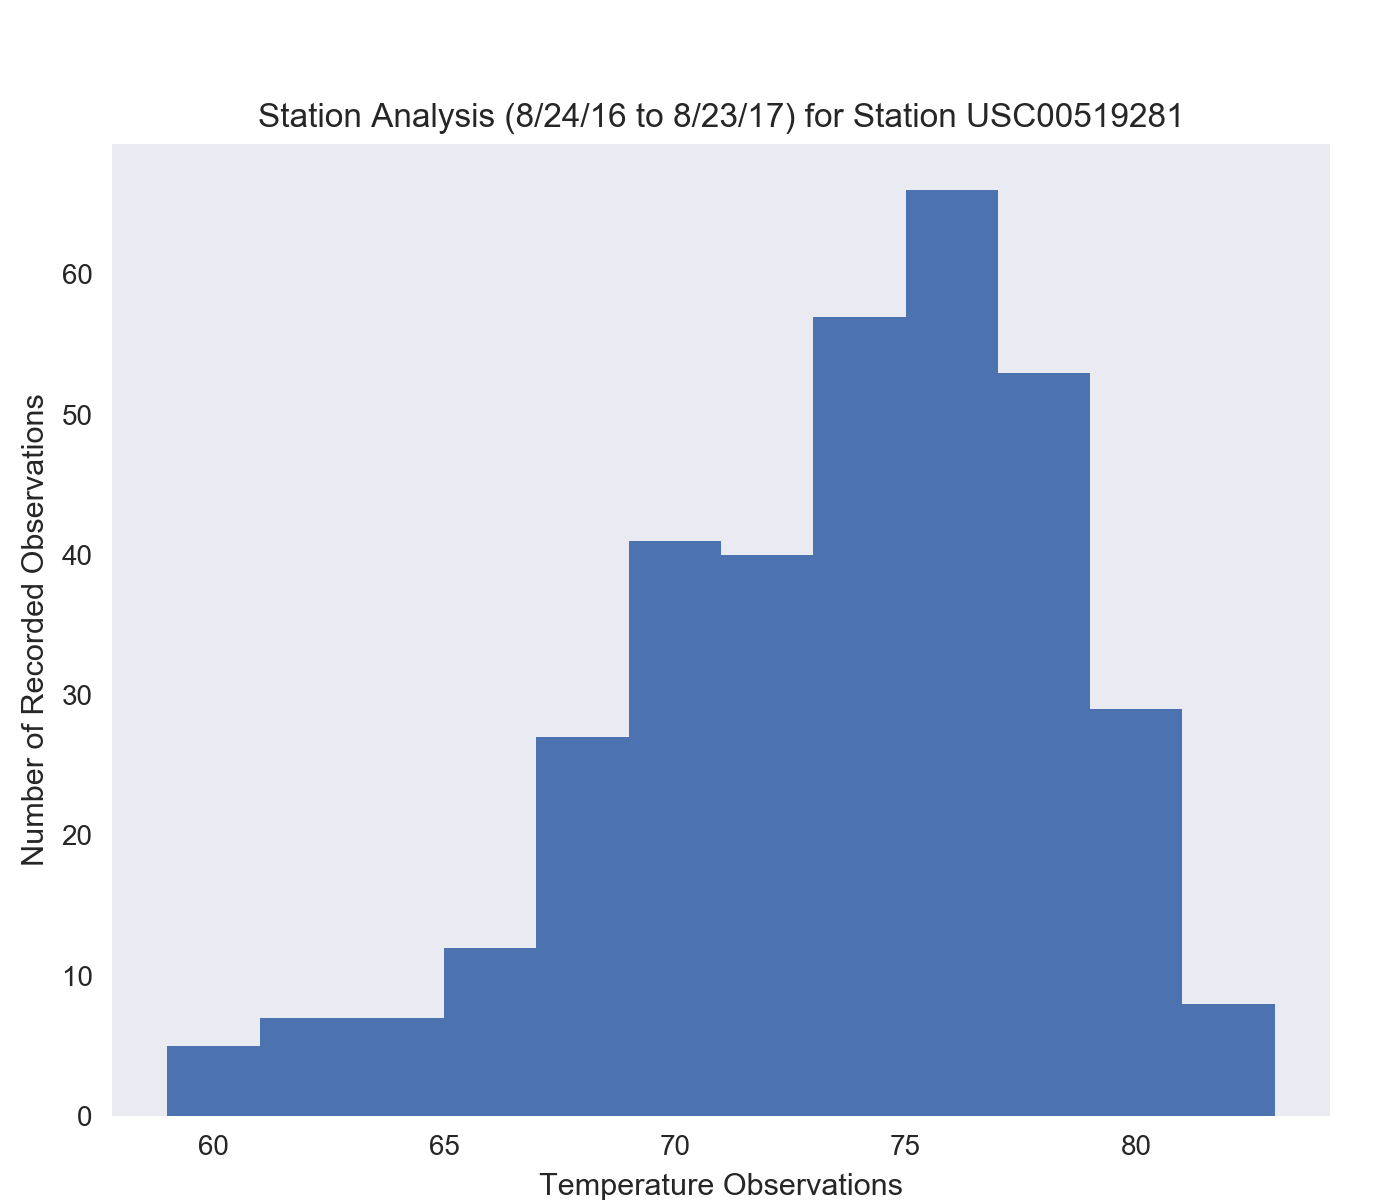

In [24]:
#HISTOGRAM FOR QUERY ABOVE:
station_tobs_df = pd.DataFrame(station_tobs, columns=['station', 'date', 'tobs'])
#station_tobs_df.head()

#BINS=12:
fig,ax = plt.subplots(figsize=(7,6))
plt.hist(station_tobs_df['tobs'], bins=12)
plt.xlabel("Temperature Observations")
plt.ylabel("Number of Recorded Observations")
plt.title("Station Analysis (8/24/16 to 8/23/17) for Station USC00519281")
plt.grid()
plt.savefig("Station USC00519281 Analysis.png")
plt.show()

#MY HISTOGRAM KEEPS SHOWING UP IN THE PRECIPITATION BAR GRAPH ABOVE

In [25]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [26]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

#MY TRIP DATES: 7/1/17 - 7/25/17

my_temps = calc_temps('2016-07-01', '2016-07-25')
temp_info = my_temps[0]
temp_info

(71.0, 77.26315789473684, 82.0)

<IPython.core.display.Javascript object>


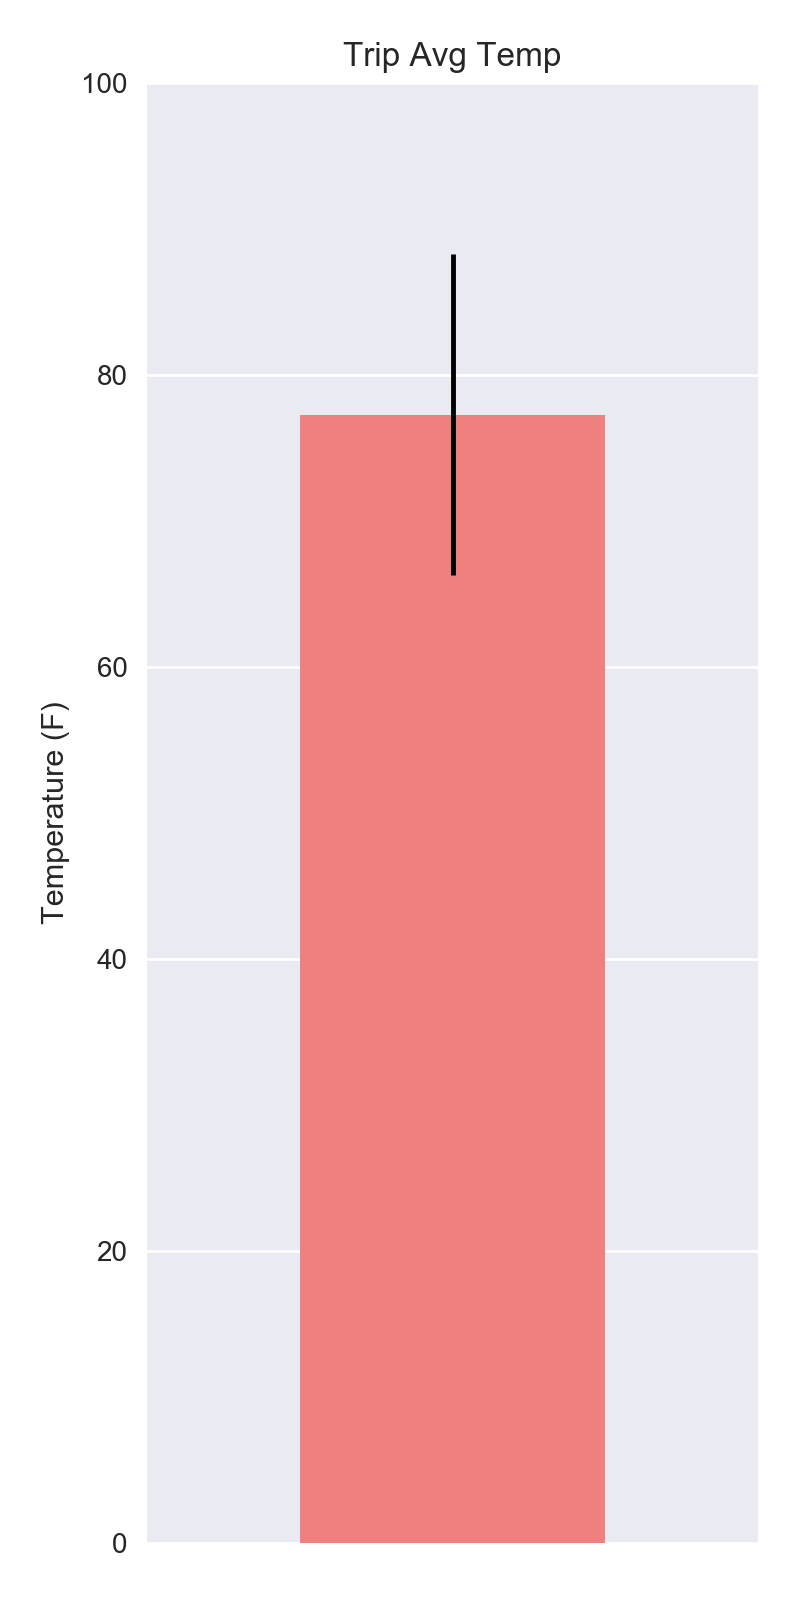

In [27]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

t_min = temp_info[0]
t_avg = temp_info[1]
t_max = temp_info[2]
x=0
y_error_bar = round(t_max - t_min,0)
fig,ax = plt.subplots(figsize=(4,8))

plt.bar(x, t_avg, width=.25, yerr=(y_error_bar), color='lightcoral')
plt.ylabel('Temperature (F)')
plt.title('Trip Avg Temp')
plt.ylim(0, 100)
plt.xlim(-.25,.25)
ax.set_xticklabels([])
plt.grid(False, axis="x")
plt.savefig("Trip Avg Temp.png")
plt.tight_layout()
plt.show()


In [ ]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

rain_per_weather_station = session.query(Measurement.station, Station.name, Station.latitude, Station.longitude, Station.elevation, \
                func.sum(Measurement.prcp)).filter(Measurement.date.between('2016-07-01','2016-07-25'))\
                .group_by(Measurement.station).join(Station, Measurement.station == Station.station)\
                .order_by(func.sum(Measurement.prcp).desc()).all()

rain_per_weather_station

In [28]:
#Step 2 - Climate App
#Now that you have completed your initial analysis, design a Flask API based on the queries you have just developed.
#Use FLASK to create your routes.
app = Flask(__name__)

#Routes
#/api/v1.0/precipitation
@app.route('/api/v1.0/precipitation') 

#Query for the dates and temperature observations from the last year.

def precipitation():
    print("Request for 'Precipitation'")
    return "These are the dates and temperature observations from last year."

    last_year = session.query(Measurement.tobs).filter(Measurement.date <= '2016-07-25') \
            .filter(Measurement.date >= '2016-07-01').order_by(Measurement.date).all()

#Convert the query results to a Dictionary using date as the key and tobs as the value.
#Return the JSON representation of your dictionary.
    dates_and_tobs = []
    for date in last_year :
        date_dict = {}
        date_dict['date'] = Measurement.date
        date_dict['temperature'] = Measurement.tobs
        dates_and_tobs.append(date_dict)
    
    return jsonify(dates_and_tobs)


In [29]:
#/api/v1.0/stations
#Return a JSON list of stations from the dataset.
@app.route('/api/v1.0/stations') 
def stations():
    print("Request for 'Stations'.")
    return "This is the list of stations from the dataset"

    station_query = session.query(Station.stations).all()
    
    return jsonify(station_query)


In [30]:
#/api/v1.0/tobs
#Return a JSON list of Temperature Observations (tobs) for the previous year.
@app.route('/api/v1.0/tobs')
def tobs():
    print("Request for 'Temperature Observations' (tobs).")
    return "This is a list of temperature observations for the previous year."

    temp_obs_query = session.query(Measurement.tobs).filter(Measurement.date <= '2016-07-01') \
                      .filter(Measurement.date >= '2016-07-25').order_by(Measurement.tobs).all()
    
    return jsonify(temp_obs_query)


In [31]:
#/api/v1.0/<start>
#Return a JSON list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end range.
@app.route('/api/v1.0/<start>)') 
def temp_start():
    print("Request for 'Min Temp, Avg Temp, & Max Temp' for a given start date.")
    return "This is the list of the teperature minimum, average & maximum for a given start date."
    
    start = Measurement.date <= '2010-01-01'
    end = Measurements.date >= '2017-08-23'
    
#When given the start only, calculate TMIN, TAVG, and TMAX for all dates greater than and equal to the start date.
    temp_start_only = session.query(Measurement.tobs).filter(Measurement.date.between(start, '2017-08-23')).all()
    
    temp_start_only_df = pd.DataFrame(temp_start_only)
    
    TMIN = temp_start_only_df.min()
    TAVG = temp_start_only_df.avg()
    TMAX = temp_start_only_df.max()
    
    
    return jsonify(TMIN, TAVG, TMAX)




#/api/v1.0/<start>/<end>
@app.route('/api/v1.0/<start>/<end>') 
def temp_range():
    print("Request for 'Min Temp, Avg Temp & Max Temp of a given start-end date range'.")
    return "This is the list of temperature minimum, average & maximum for a given start-end date range"

#When given the start and the end date, calculate the TMIN, TAVG, and TMAX for dates between the start and end date inclusive.
    temp_given_range = session.query(Measurement.tobs).filter(Measurement.date.between(start, end)).all()
    
    temp_given_range_df = pd.DataFrame(temp_given_range)
    
    TMIN_2 = temp_given_range_df.min()
    TAVG_2 = temp_given_range_df.avg()
    TMAX_2 = temp_given_range_df.max()
    
    
    return jsonify(TMIN_2, TAVG_2, TMAX_2)



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
